## PetMind is a retailer of products for pets. They are based in the United States.
#### PetMind sells products that are a mix of luxury items and everyday items. Luxury items include toys. Everyday items include food.
#### The company wants to increase sales by selling more everyday products repeatedly.
#### They have been testing this approach for the last year.
#### They now want a report on how repeat purchases impact sales.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Validation
The Original data is 1500 rows and 8 columns
- The first thing I did was to check the information about a DataFrame including the index dtype and columns. 
    + 150 entries that was missing values in 'rating' column so I replaced with 0 as required
    + 'price' column had some values as 'unlisted' and datatype was object, I replaced with the overall median price as required then changing datatype to float
- I checked categorical values in 'category', 'animal' and 'size'
    + There were 25 unreasonable values as '-' in 'category' column so I replaced with 'Unknown'
    + Converting values in 'size' to be capitalized.

In [2]:
pet_supplies = pd.read_csv('pet_supplies_2212.csv')
pet_supplies.head()

,product_id,category,animal,size,price,sales,rating,repeat_purchase
0,1,Food,Bird,large,51.1,1860.62,7.0,1
1,2,Housing,Bird,MEDIUM,35.98,963.60,6.0,0
2,3,Food,Dog,medium,31.23,898.30,5.0,1
3,4,Medicine,Cat,small,24.95,982.15,6.0,1
4,5,Housing,Cat,Small,26.18,832.63,7.0,1


In [3]:
pet_supplies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   product_id       1500 non-null   int64  
 1   category         1500 non-null   object 
 2   animal           1500 non-null   object 
 3   size             1500 non-null   object 
 4   price            1500 non-null   object 
 5   sales            1500 non-null   float64
 6   rating           1350 non-null   float64
 7   repeat_purchase  1500 non-null   int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 93.9+ KB


In [4]:
for i in ['category', 'animal', 'size']:
    print(f'Values in "{i}" \n{pet_supplies[i].value_counts()}\n')

Values in "category" 
Equipment    370
Food         260
Toys         255
Medicine     237
Housing      227
Accessory    126
-             25
Name: category, dtype: int64

Values in "animal" 
Cat     567
Fish    369
Dog     367
Bird    197
Name: animal, dtype: int64

Values in "size" 
small     372
medium    233
Small     225
SMALL     157
Medium    150
large     122
MEDIUM    109
Large      75
LARGE      57
Name: size, dtype: int64



In [5]:
pet_supplies = pet_supplies.fillna({'rating':0})
pet_supplies['price'] = pet_supplies['price'].replace('unlisted', 0)
median_price = pet_supplies['price'].median()
pet_supplies['price'] = pet_supplies['price'].replace(0, median_price)
pet_supplies['price'] = pet_supplies['price'].astype(float)
pet_supplies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   product_id       1500 non-null   int64  
 1   category         1500 non-null   object 
 2   animal           1500 non-null   object 
 3   size             1500 non-null   object 
 4   price            1500 non-null   float64
 5   sales            1500 non-null   float64
 6   rating           1500 non-null   float64
 7   repeat_purchase  1500 non-null   int64  
dtypes: float64(3), int64(2), object(3)
memory usage: 93.9+ KB


In [6]:
pet_supplies['category'] = pet_supplies['category'].replace('-','Unknown')
pet_supplies['size'] = pet_supplies['size'].str.capitalize()

In [7]:
for i in ['category', 'animal', 'size']:
    print(f'Values in "{i}" \n{pet_supplies[i].value_counts()}\n')

Values in "category" 
Equipment    370
Food         260
Toys         255
Medicine     237
Housing      227
Accessory    126
Unknown       25
Name: category, dtype: int64

Values in "animal" 
Cat     567
Fish    369
Dog     367
Bird    197
Name: animal, dtype: int64

Values in "size" 
Small     754
Medium    492
Large     254
Name: size, dtype: int64



## Data Discovery and Visualization

### Which category of the variable repeat purchases has the most observations?

There were 7 types of category. 
In term of repeat purchases, I created a new DataFrame that included the row of repeat purchases ('repeat_purchase'=1). 'Equipment' was the most repeated type, followed by 'Medicine', 'Housing', 'Food', 'Toys' with approximately the same observations. When observing the entire data set, there was the similar result, the most purchased type was also 'Equipment'

In [8]:
repeat_supplies = pet_supplies[pet_supplies['repeat_purchase'] == 1]
repeat_supplies

,product_id,category,animal,size,price,sales,rating,repeat_purchase
0,1,Food,Bird,Large,51.10,1860.62,7.0,1
2,3,Food,Dog,Medium,31.23,898.30,5.0,1
3,4,Medicine,Cat,Small,24.95,982.15,6.0,1
4,5,Housing,Cat,Small,26.18,832.63,7.0,1
10,11,Food,Dog,Large,40.87,1457.22,7.0,1
...,...,...,...,...,...,...,...,...
1490,1491,Medicine,Cat,Medium,20.14,746.16,7.0,1
1492,1493,Medicine,Cat,Small,24.95,993.08,7.0,1
1493,1494,Housing,Fish,Small,21.00,535.90,3.0,1
1498,1499,Medicine,Fish,Small,19.94,658.66,5.0,1


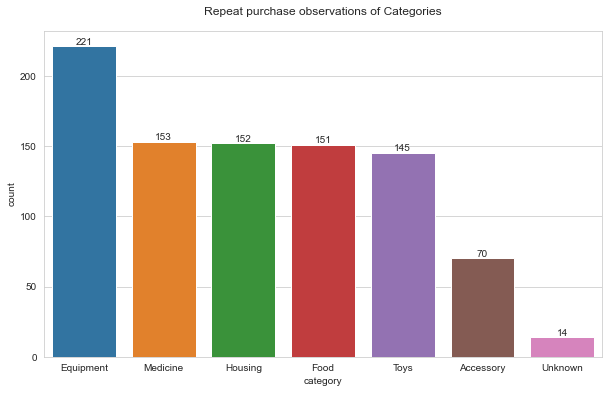

In [9]:
plt.figure(figsize=(10,6))
sns.set_style('whitegrid')
c = sns.countplot(data=repeat_supplies, x='category', order=repeat_supplies['category'].value_counts().index)
c.bar_label(c.containers[0])
c.set_title("Repeat purchase observations of Categories", y=1.03)
plt.show()

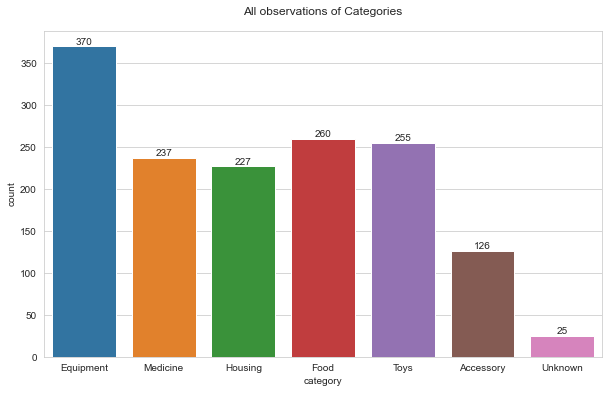

In [10]:
plt.figure(figsize=(10,6))
c = sns.countplot(data=pet_supplies, x='category', order=repeat_supplies['category'].value_counts().index)
c.bar_label(c.containers[0])
c.set_title("All observations of Categories", y=1.03)
plt.show()

## Distibution of all of the sales
- Looking at the charts as below, at least approximately 75% of the sales value is greater than 750, the remaining 25% of the value is between 280 and 750. There were some outliers that was greater than 1800 but they were uncommon. And the most values were less than 1500

In [11]:
pet_supplies['sales'].describe()

count    1500.000000
mean      996.597847
std       323.952676
min       286.940000
25%       747.420000
50%      1000.830000
75%      1158.157500
max      2255.960000
Name: sales, dtype: float64

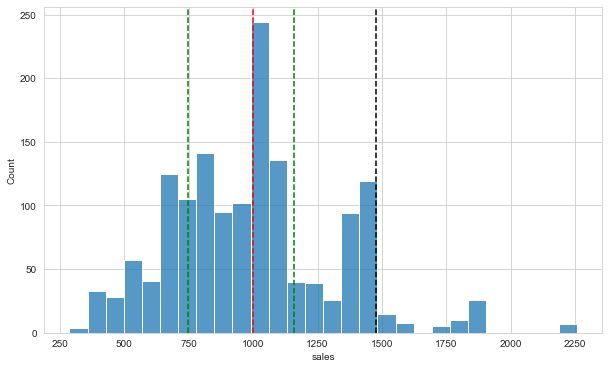

In [20]:
plt.figure(figsize=(10,6))

sns.histplot(data=pet_supplies, x='sales')
plt.axvline(x=pet_supplies['sales'].quantile(0.75), color='g', linestyle='--')
plt.axvline(x=pet_supplies['sales'].quantile(0.25), color='g', linestyle='--')
plt.axvline(x=pet_supplies['sales'].median(), color='r', linestyle='--')
plt.axvline(x=pet_supplies['sales'].quantile(0.95), color='k', linestyle='--')
plt.show()

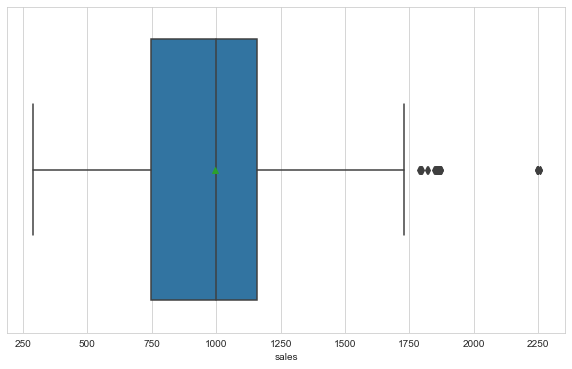

In [13]:
plt.figure(figsize=(10,6))
sns.boxplot(data=pet_supplies, x='sales', showmeans=True)
plt.show()

- The top 3 total sales by category were 'Equipment' (348875), 'Toys' (319897) and 'Food' (287138)
- 'Equipment' category had the highest total sales, however, the iterquartile was lower than other categories like 'Accessory', 'Food', 'Medicine' and 'Toys'. Beside, 'Toys' had the highest sales median value. 
- Sales assessment from other aspects, customers spent the most amount on cat (574232), significantly higher than the second ranked pet, which was dog, customer spent 388406 on them. Also, sales by size shows that the small size had the highest total sales (761296), approximately twice as much as the medium and large sizes. 

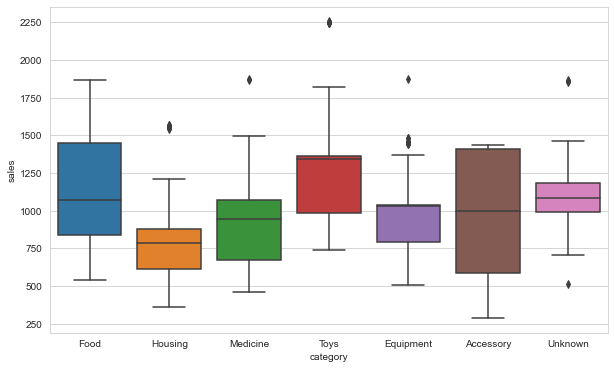

In [14]:
plt.figure(figsize=(10,6))
sns.boxplot(data=pet_supplies, y='sales', x='category')
plt.show()

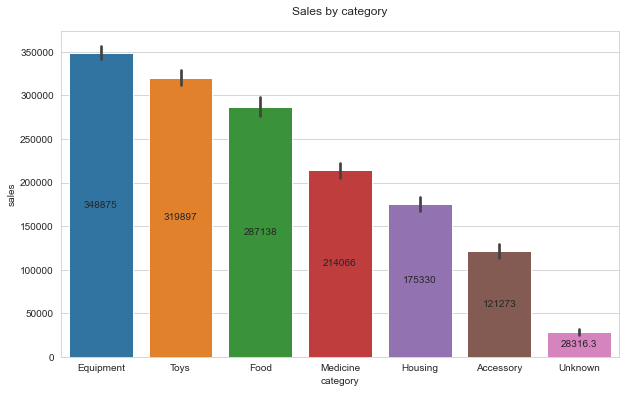

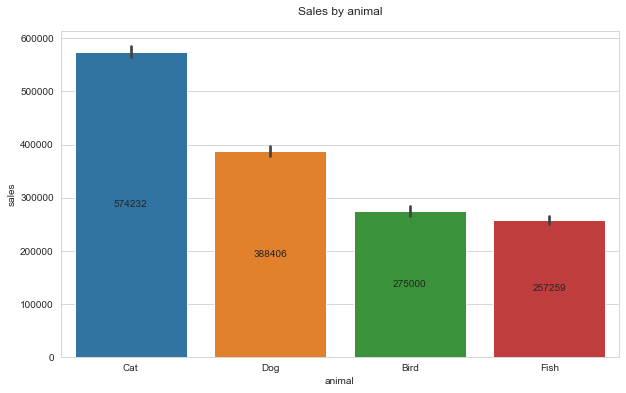

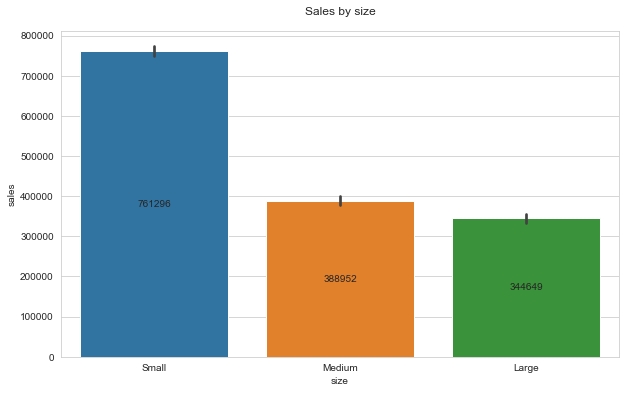

In [15]:
for i in ['category', 'animal', 'size']:
    plt.figure(figsize=(10,6))
    sorted_list = pet_supplies.groupby(i)['sales'].sum().sort_values(ascending=False).index
    g = sns.barplot(data=pet_supplies, y='sales', x=i, estimator=sum, order=sorted_list)
    g.set_title(f"Sales by {i}", y=1.03)
    g.bar_label(g.containers[0], label_type='center')
    plt.show()

## Relationship between repeat purchases and sales
- Repeat purchases took for 60.4% of total purchases and total sales from repeated purchases also took a higher rate of 59.1% than non-repeated purchases.
- Repeat purchases took a larger share of total sales

In [16]:
import numpy as np
grouped_df = pet_supplies.groupby('repeat_purchase', as_index=False).agg(nb_purchases=('product_id','count'),
                                                                            total_sales=('sales','sum'))
grouped_df['repeat_type'] = np.where(grouped_df['repeat_purchase'] == 1, 'repeated purchases', 'non-repeated purchases')
grouped_df

,repeat_purchase,nb_purchases,total_sales,repeat_type
0,0,594,610850.60,non-repeated purchases
1,1,906,884046.17,repeated purchases


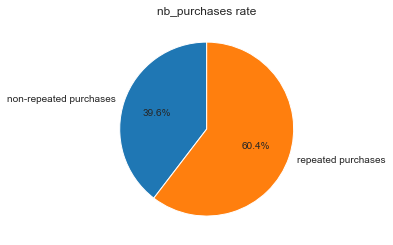

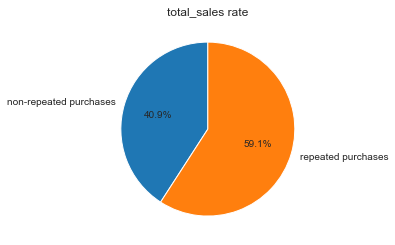

In [17]:
for i in ['nb_purchases', 'total_sales']:
    plt.figure(figsize = (8,4))
    plt.pie(data=grouped_df,
            x=grouped_df[i],
            labels = grouped_df['repeat_type'],
            autopct='%.1f%%', startangle = 90)
    plt.title(f'{i} rate')
    plt.show()


- Sales by category was the similar. In all categories, repeated purchases had higher sales than non-repeated purchases
- Repeated purchases of 'Food' was greater than non-repeated. So selling more everday repeated products increased sales

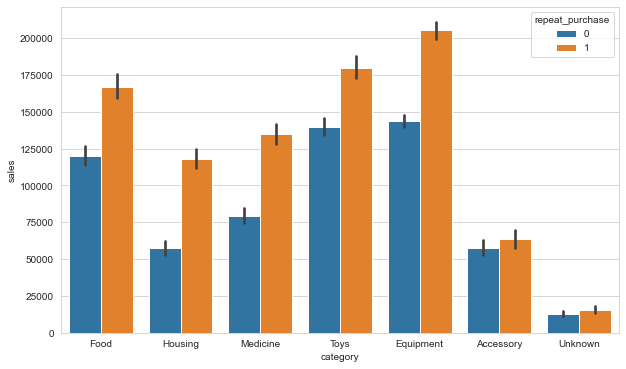

In [18]:
plt.figure(figsize=(10,6))
sns.barplot(data=pet_supplies, y='sales', x='category', estimator=sum, hue='repeat_purchase')
plt.show()